### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [6]:
# Cria a coluna 'Valor Final'
loja['Valor Final'] = loja['Preço'] * loja['Quantidade de parcelas']
loja2['Valor Final'] = loja2['Preço'] * loja2['Quantidade de parcelas']
loja3['Valor Final'] = loja3['Preço'] * loja3['Quantidade de parcelas']
loja4['Valor Final'] = loja4['Preço'] * loja4['Quantidade de parcelas']

# Calcula o faturamento total de cada loja
faturamento_loja1 = loja['Valor Final'].sum()
faturamento_loja2 = loja2['Valor Final'].sum()
faturamento_loja3 = loja3['Valor Final'].sum()
faturamento_loja4 = loja4['Valor Final'].sum()

In [7]:
# Exibe os resultados
print(f"Faturamento Loja 1: R${faturamento_loja1:.2f}")
print(f"Faturamento Loja 2: R${faturamento_loja2:.2f}")
print(f"Faturamento Loja 3: R${faturamento_loja3:.2f}")
print(f"Faturamento Loja 4: R${faturamento_loja4:.2f}")

Faturamento Loja 1: R$4563636.11
Faturamento Loja 2: R$4449584.18
Faturamento Loja 3: R$4325091.42
Faturamento Loja 4: R$4131753.14


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

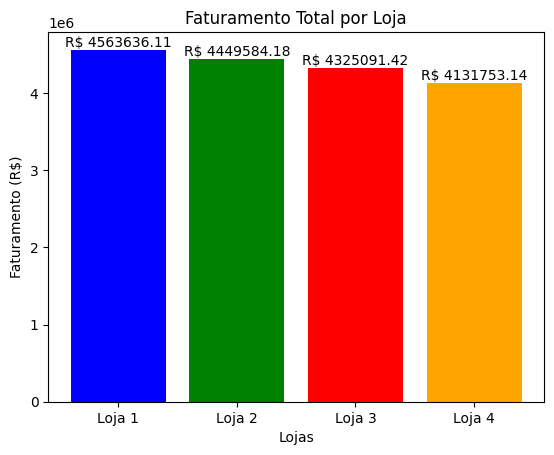

In [8]:
import matplotlib.pyplot as plt

# Dados para o gráfico
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Criando o gráfico de barras
plt.bar(lojas, faturamentos, color=['blue', 'green', 'red', 'orange'])  # Personalizando as cores das barras

plt.title('Faturamento Total por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')

# Adicionando os valores do faturamento acima de cada barra
for i, v in enumerate(faturamentos):
    plt.text(i, v, f'R$ {v:.2f}', ha='center', va='bottom')

plt

# 2. Vendas por Categoria

> Add blockquote




In [9]:
# Agrupa as vendas por categoria e soma a quantidade vendida para cada loja
vendas_por_categoria_loja1 = loja.groupby('Categoria do Produto')['Quantidade de parcelas'].sum()
vendas_por_categoria_loja2 = loja2.groupby('Categoria do Produto')['Quantidade de parcelas'].sum()
vendas_por_categoria_loja3 = loja3.groupby('Categoria do Produto')['Quantidade de parcelas'].sum()
vendas_por_categoria_loja4 = loja4.groupby('Categoria do Produto')['Quantidade de parcelas'].sum()


In [10]:
# Exibe os resultados para cada loja
print("Loja 1:\n", vendas_por_categoria_loja1)
print("\nLoja 2:\n", vendas_por_categoria_loja2)
print("\nLoja 3:\n", vendas_por_categoria_loja3)
print("\nLoja 4:\n", vendas_por_categoria_loja4)

Loja 1:
 Categoria do Produto
brinquedos                872
eletrodomesticos          906
eletronicos              1341
esporte e lazer           796
instrumentos musicais     573
livros                    520
moveis                   1446
utilidades domesticas     489
Name: Quantidade de parcelas, dtype: int64

Loja 2:
 Categoria do Produto
brinquedos                876
eletrodomesticos          890
eletronicos              1333
esporte e lazer           720
instrumentos musicais     659
livros                    611
moveis                   1265
utilidades domesticas     493
Name: Quantidade de parcelas, dtype: int64

Loja 3:
 Categoria do Produto
brinquedos                937
eletrodomesticos          882
eletronicos              1262
esporte e lazer           873
instrumentos musicais     580
livros                    517
moveis                   1408
utilidades domesticas     542
Name: Quantidade de parcelas, dtype: int64

Loja 4:
 Categoria do Produto
brinquedos                92

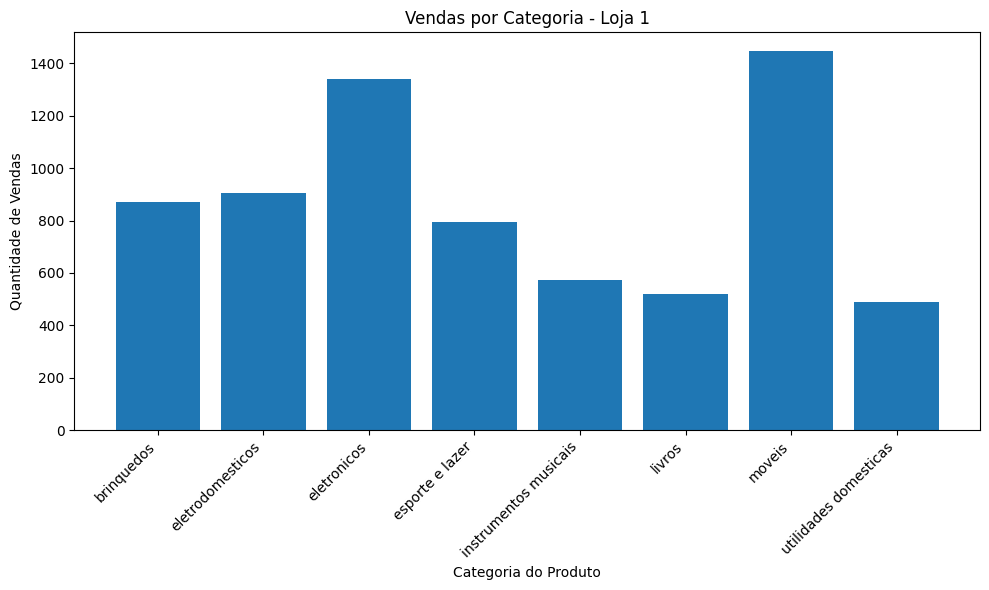

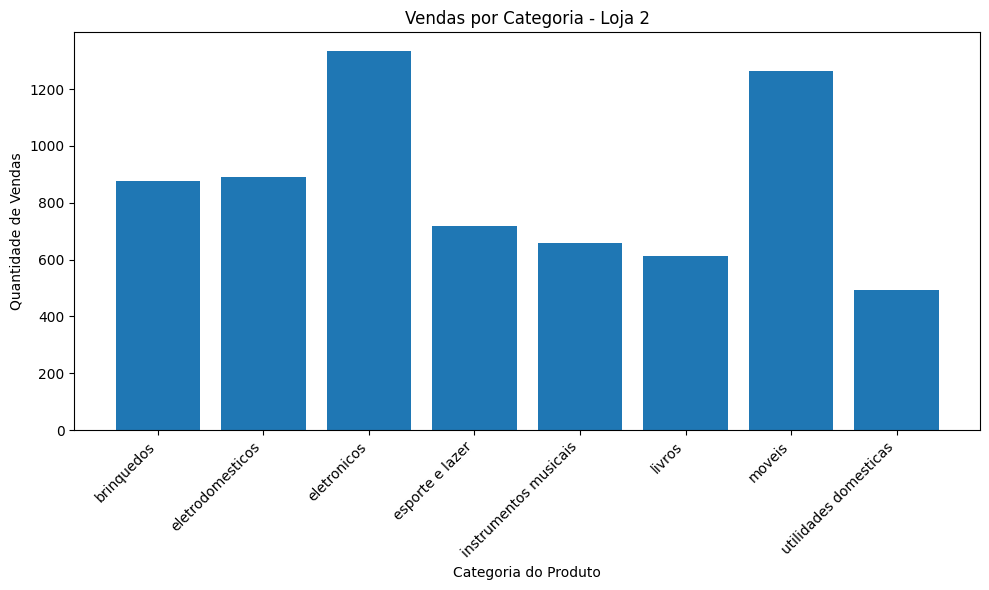

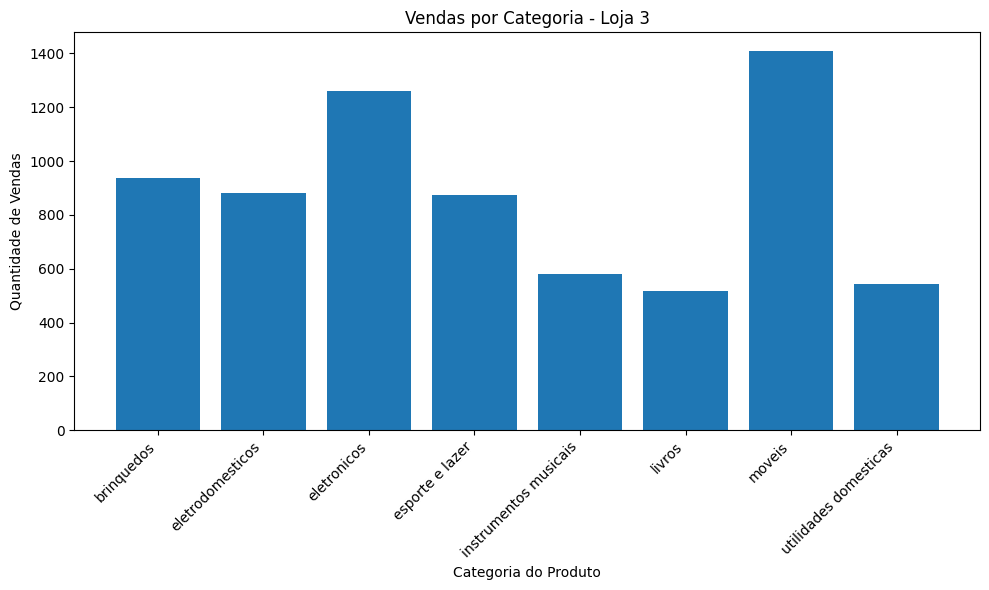

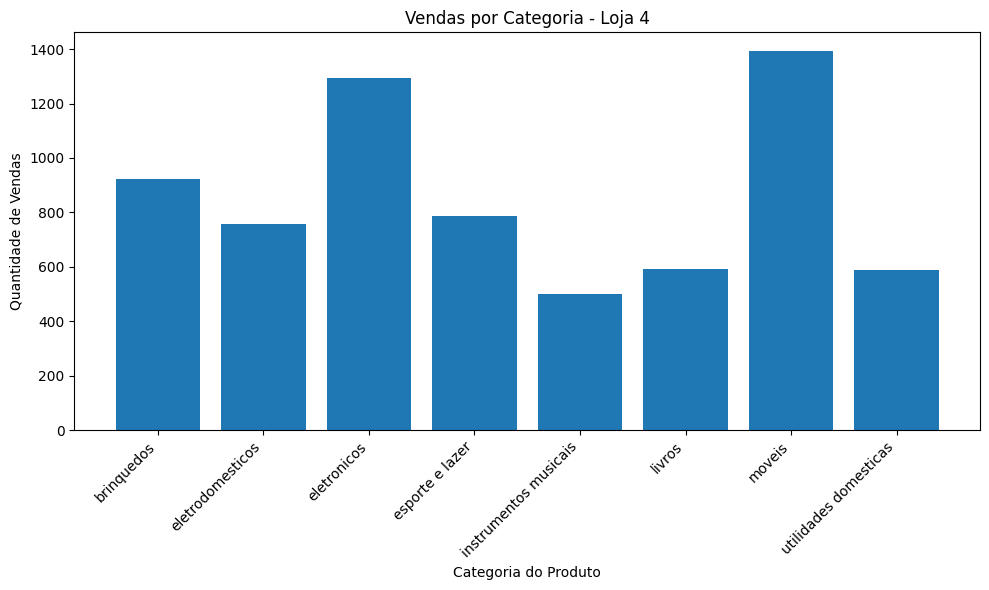

In [11]:
# Função para criar gráfico de barras para uma loja
def criar_grafico_vendas_categoria(loja_nome, vendas_por_categoria):
    plt.figure(figsize=(10, 6))  # Define o tamanho da figura
    plt.bar(vendas_por_categoria.index, vendas_por_categoria.values)
    plt.title(f'Vendas por Categoria - {loja_nome}')
    plt.xlabel('Categoria do Produto')
    plt.ylabel('Quantidade de Vendas')
    plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
    plt.show()

# Cria gráficos para cada loja
criar_grafico_vendas_categoria('Loja 1', vendas_por_categoria_loja1)
criar_grafico_vendas_categoria('Loja 2', vendas_por_categoria_loja2)
criar_grafico_vendas_categoria('Loja 3', vendas_por_categoria_loja3)
criar_grafico_vendas_categoria('Loja 4', vendas_por_categoria_loja4)

# 3. Média de Avaliação das Lojas

In [12]:
# Calcula a média de avaliação de cada loja
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

In [13]:
# Exibe os resultados
print(f"Média de Avaliação Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Média de Avaliação Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Média de Avaliação Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Média de Avaliação Loja 4: {media_avaliacao_loja4:.2f}")

Média de Avaliação Loja 1: 3.98
Média de Avaliação Loja 2: 4.04
Média de Avaliação Loja 3: 4.05
Média de Avaliação Loja 4: 4.00


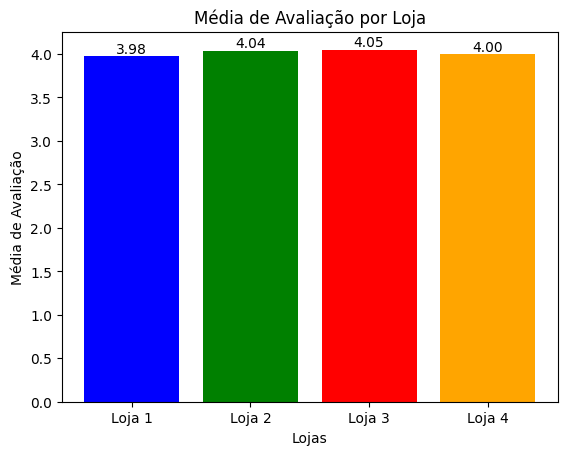

In [14]:
# Cria um gráfico de barras para comparar as médias de avaliação das lojas
import matplotlib.pyplot as plt

medias_avaliacao = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.bar(lojas, medias_avaliacao, color=['blue', 'green', 'red', 'orange'])
plt.title('Média de Avaliação por Loja')
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliação')

# Adiciona os valores das médias de avaliação acima de cada barra
for i, v in enumerate(medias_avaliacao):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [15]:
# Agrupa as vendas por produto e soma a quantidade vendida para cada loja
vendas_por_produto_loja1 = loja.groupby('Produto')['Quantidade de parcelas'].sum()
vendas_por_produto_loja2 = loja2.groupby('Produto')['Quantidade de parcelas'].sum()
vendas_por_produto_loja3 = loja3.groupby('Produto')['Quantidade de parcelas'].sum()
vendas_por_produto_loja4 = loja4.groupby('Produto')['Quantidade de parcelas'].sum()


In [16]:
# Encontra os produtos mais e menos vendidos em cada loja
mais_vendido_loja1 = vendas_por_produto_loja1.idxmax()
menos_vendido_loja1 = vendas_por_produto_loja1.idxmin()
mais_vendido_loja2 = vendas_por_produto_loja2.idxmax()
menos_vendido_loja2 = vendas_por_produto_loja2.idxmin()
mais_vendido_loja3 = vendas_por_produto_loja3.idxmax()
menos_vendido_loja3 = vendas_por_produto_loja3.idxmin()
mais_vendido_loja4 = vendas_por_produto_loja4.idxmax()
menos_vendido_loja4 = vendas_por_produto_loja4.idxmin()


In [17]:
# Exibe os resultados
print(f"Loja 1: Mais vendido - {mais_vendido_loja1}, Menos vendido - {menos_vendido_loja1}")
print(f"Loja 2: Mais vendido - {mais_vendido_loja2}, Menos vendido - {menos_vendido_loja2}")
print(f"Loja 3: Mais vendido - {mais_vendido_loja3}, Menos vendido - {menos_vendido_loja3}")
print(f"Loja 4: Mais vendido - {mais_vendido_loja4}, Menos vendido - {menos_vendido_loja4}")

Loja 1: Mais vendido - Secadora de roupas, Menos vendido - Celular ABXY
Loja 2: Mais vendido - Iniciando em programação, Menos vendido - Mesa de jantar
Loja 3: Mais vendido - Bicicleta, Menos vendido - TV Led UHD 4K
Loja 4: Mais vendido - Dashboards com Power BI, Menos vendido - Guarda roupas


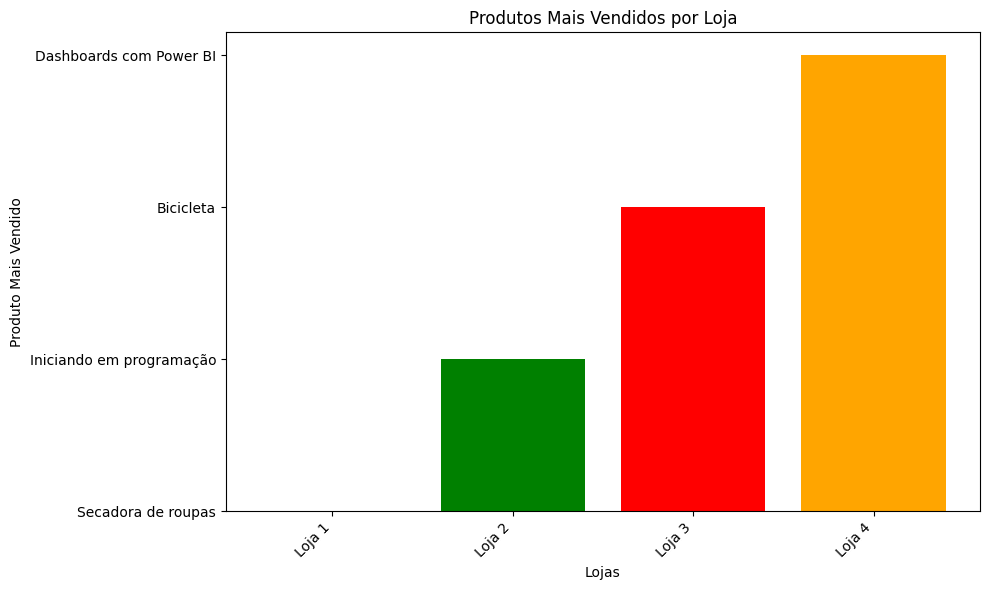

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para o gráfico
produtos_mais_vendidos = [mais_vendido_loja1, mais_vendido_loja2, mais_vendido_loja3, mais_vendido_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(lojas, produtos_mais_vendidos, color=['blue', 'green', 'red', 'orange'])
plt.title('Produtos Mais Vendidos por Loja')
plt.xlabel('Lojas')
plt.ylabel('Produto Mais Vendido')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Ajusta o eixo y para exibir os nomes dos produtos como rótulos
plt.yticks(np.arange(len(produtos_mais_vendidos)), produtos_mais_vendidos)

plt.show()

# 5. Frete Médio por Loja


In [19]:
# Calcula o frete médio de cada loja
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

In [20]:
# Exibe os resultados
print(f"Frete Médio Loja 1: R${frete_medio_loja1:.2f}")
print(f"Frete Médio Loja 2: R${frete_medio_loja2:.2f}")
print(f"Frete Médio Loja 3: R${frete_medio_loja3:.2f}")
print(f"Frete Médio Loja 4: R${frete_medio_loja4:.2f}")

Frete Médio Loja 1: R$34.69
Frete Médio Loja 2: R$33.62
Frete Médio Loja 3: R$33.07
Frete Médio Loja 4: R$31.28


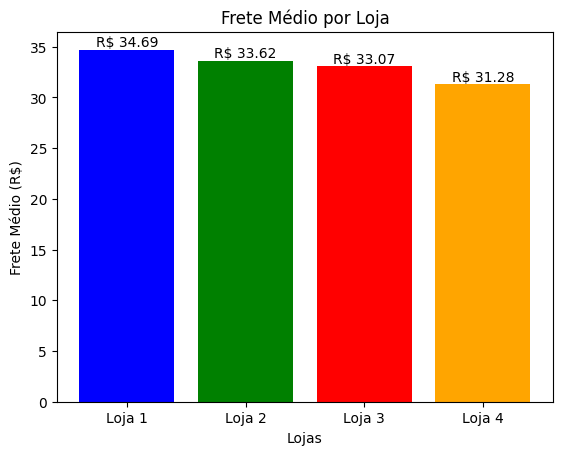

In [21]:
# Cria um gráfico de barras para comparar os fretes médios das lojas (opcional)
import matplotlib.pyplot as plt

fretes_medios = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.bar(lojas, fretes_medios, color=['blue', 'green', 'red', 'orange'])
plt.title('Frete Médio por Loja')
plt.xlabel('Lojas')
plt.ylabel('Frete Médio (R$)')

# Adiciona os valores dos fretes médios acima de cada barra
for i, v in enumerate(fretes_medios):
    plt.text(i, v, f'R$ {v:.2f}', ha='center', va='bottom')

plt.show()